## Time Series Challenge
In this challenge, we will compare different time series prediction techniques on the dataset we can find [here](https://drive.google.com/file/d/1pgZlxluv5_cbgwR5JSWu4njbYXo_06Eb/view?usp=sharing).
- moving average
- ARIMA
- Prophet
- (Stretch) LSTMs

There are several item categories in this sales data. You can choose your own category or predict overal sales.

> #### Note
> We have one order in every row, so don't forget to transform data into time series format first. The data can be transformed to daily, weekly or monthly timeseries.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
url = '/home/henri/Documents/Lighthouse-lab/Databases/w9-d2-db/Sample - Superstore.csv'
df = pd.read_csv(url)

In [152]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<AxesSubplot:>

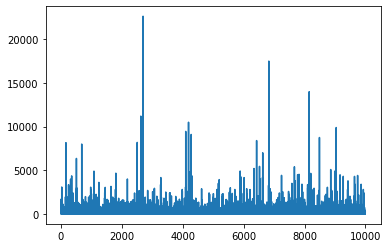

In [154]:
df['Sales'].plot()

In [155]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [156]:
df = df.resample('W', on='Order Date').sum()

,Order Date,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,2014-01-05,11964,277858,324.0440,13,1.60,-55.5549
1,2014-01-12,83815,792563,4599.5720,49,1.80,1322.7434
2,2014-01-19,80387,1317701,4509.1270,99,5.05,398.8863
3,2014-01-26,139395,1478881,3842.3880,108,1.00,758.0377
4,2014-02-02,51137,689053,1642.3100,33,1.45,239.5467
...,...,...,...,...,...,...,...
204,2017-12-03,597949,6892083,32354.5700,564,22.00,2081.8161
205,2017-12-10,595057,7154341,24006.9580,480,15.10,1099.1676
206,2017-12-17,464124,4321849,10495.9630,267,10.25,758.9628
207,2017-12-24,460838,5209383,23662.3640,372,12.55,4245.4893


In [161]:
df = df.reset_index()

In [162]:
dfFloat = df.select_dtypes(exclude=['object'])
dfFloat = dfFloat.drop(['Row ID','Postal Code'],axis=1)

In [163]:
dfFloat.head()

,Order Date,Sales,Quantity,Discount,Profit
0,2014-01-05,324.044,13,1.60,-55.5549
1,2014-01-12,4599.572,49,1.80,1322.7434
2,2014-01-19,4509.127,99,5.05,398.8863
3,2014-01-26,3842.388,108,1.00,758.0377
4,2014-02-02,1642.310,33,1.45,239.5467


## Prophet

In [164]:
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

In [165]:
dfProphet = dfFloat[['Order Date','Sales']]

In [166]:
dfProphet = dfProphet.rename(columns={"Order Date": "ds", "Sales": "y"})
dfProphet.head()

,ds,y
0,2014-01-05,324.044
1,2014-01-12,4599.572
2,2014-01-19,4509.127
3,2014-01-26,3842.388
4,2014-02-02,1642.310


In [167]:
dfProphet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      209 non-null    datetime64[ns]
 1   y       209 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [168]:
m = Prophet()
m.fit(dfProphet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [169]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
569,2018-12-27
570,2018-12-28
571,2018-12-29
572,2018-12-30
573,2018-12-31


In [170]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
569,2018-12-27,19610.137123,12999.110307,26231.133965
570,2018-12-28,18987.662516,12515.369242,25832.931741
571,2018-12-29,18342.194232,11351.948810,25042.628033
572,2018-12-30,17679.384923,11196.655935,24241.099492
573,2018-12-31,17005.431610,9871.341628,23727.768010


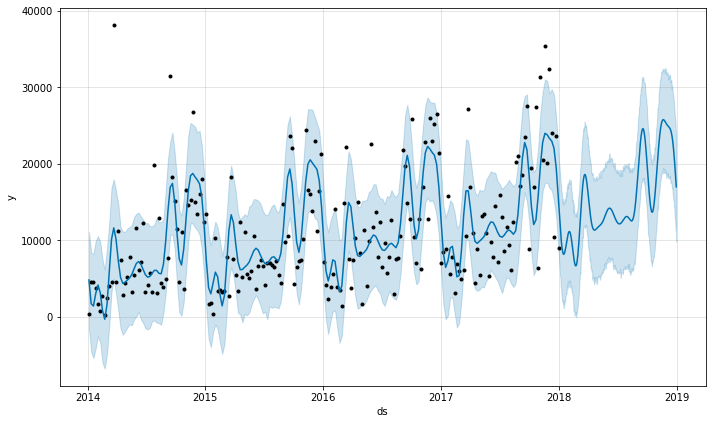

In [171]:
fig1 = m.plot(forecast)

In [ ]:
import seaborn as sns
sns.limplot()

## LTSM

### Single value

In [87]:
dfFloat

,Order Date,Sales,Quantity,Discount,Profit
0,2016-11-08,261.9600,2,0.00,41.9136
1,2016-11-08,731.9400,3,0.00,219.5820
2,2016-06-12,14.6200,2,0.00,6.8714
3,2015-10-11,957.5775,5,0.45,-383.0310
4,2015-10-11,22.3680,2,0.20,2.5164
...,...,...,...,...,...
9989,2014-01-21,25.2480,3,0.20,4.1028
9990,2017-02-26,91.9600,2,0.00,15.6332
9991,2017-02-26,258.5760,2,0.20,19.3932
9992,2017-02-26,29.6000,4,0.00,13.3200


In [112]:
dfFloat.shape

(9994, 5)

In [113]:
train = dfFloat.iloc[:, :8000]
test = dfFloat.iloc[:, 8000:]

In [109]:
dfFloat = dfFloat.set_index(df['Order Date'])
dfFloat = dfFloat.sort_index()
dfFloat

,Order Date,Sales,Quantity,Discount,Profit
Order Date,,,,,
2014-01-03,2014-01-03,16.448,2,0.2,5.5512
2014-01-04,2014-01-04,11.784,3,0.2,4.2717
2014-01-04,2014-01-04,272.736,3,0.2,-64.7748
2014-01-04,2014-01-04,3.540,2,0.8,-5.4870
2014-01-05,2014-01-05,19.536,3,0.2,4.8840
...,...,...,...,...,...
2017-12-30,2017-12-30,3.024,3,0.2,-0.6048
2017-12-30,2017-12-30,52.776,3,0.2,19.7910
2017-12-30,2017-12-30,90.930,7,0.0,2.7279


In [111]:
train = df[pd.to_datetime('2014-01-03'):pd.to_datetime('2016-12-20')]
test  = df['2016-12-21':]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

TypeError: cannot do slice indexing on RangeIndex with these indexers [2014-01-03 00:00:00] of type Timestamp

In [114]:
train.iloc[:, 1:2]

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,11.784
2014-01-04,272.736
2014-01-04,3.540
2014-01-05,19.536
...,...
2017-12-30,3.024
2017-12-30,52.776
2017-12-30,90.930


In [115]:
training_set = pd.DataFrame(train.iloc[:, 1:2].values)
test_set = pd.DataFrame(test.iloc[:, 1:2].values)

In [116]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [117]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [118]:
!pip install keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [119]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
62/62 [==============================] - 5s 83ms/step - loss: 0.0011
Epoch 2/10
62/62 [==============================] - 5s 80ms/step - loss: 0.0011
Epoch 3/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0012
Epoch 4/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0011
Epoch 5/10
62/62 [==============================] - 5s 78ms/step - loss: 0.0011
Epoch 6/10
62/62 [==============================] - 5s 74ms/step - loss: 0.0011
Epoch 7/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0011
Epoch 8/10
62/62 [==============================] - 5s 80ms/step - loss: 0.0011
Epoch 9/10
62/62 [==============================] - 5s 77ms/step - loss: 0.0011
Epoch 10/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0011


In [138]:

inputs = dfFloat[len(dfFloat) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

TypeError: float() argument must be a string or a number, not 'Timestamp'

<AxesSubplot:>

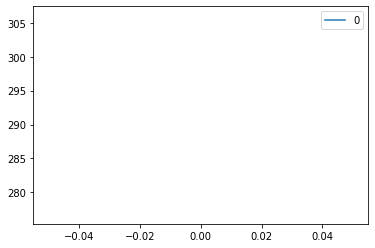

In [137]:
pd.DataFrame(predicted_stock_price.plot()

In [132]:
plt.plot(training_set)
plt.plot(test_set)

ZeroDivisionError: integer division or modulo by zero

In [ ]:
plt.plot(training_set)

In [124]:
plt.plot(test_set.iloc[:, 1:2].values, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

ZeroDivisionError: integer division or modulo by zero